In [1]:
import scipy.optimize as opt
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from PIL import Image
%matplotlib notebook

In [2]:
def get_image(image_path, scale):
    """Get a numpy array of an image so that one can access values[x][y]."""
    image = Image.open(image_path, "r")
    width, height = image.size
    l = max(width, height)
    c = l/scale
    x = np.linspace(0, c, l)
    x, y = np.meshgrid(x, x)
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = np.array(pixel_values).reshape((width, height, channels))
    return pixel_values, x, y, width, height, l, c


In [19]:
im, x, y, width, height, l, c = get_image("images/image3.jpg", 1)
R = im[:,:,0]
R = R.reshape(width, height)
buffer = np.zeros((l-width,l))
print(R.shape, buffer.shape)
R = np.concatenate((R,buffer), axis=0)
#R = R.reshape(R.shape[0], R.shape[1],1)
print(R.shape)

(682, 792) (110, 792)
(792, 792)


In [20]:
plt.imshow(R,aspect='auto')
plt.show()

In [21]:
p = R[:,:]
print(p.shape)
#im = p[:,:,0]#+p[:,:,1]+p[:,:,2]
plt.imshow(p)
plt.show()

(792, 792)


NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

<IPython.core.display.Javascript object>


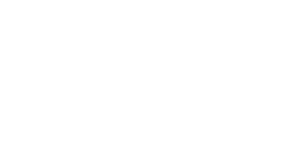

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, p, cmap="magma")
#plt.savefig("test2.jpg")
plt.show()

In [26]:
def twoD_Gaussian(mesh, amplitude, x_0, y_0, sigma, offset):
    (x, y) = mesh
    x_0 = float(x_0)
    y_0 = float(y_0)
    g = offset + amplitude*np.exp(-0.5*(((x-x_0)**2) + ((y-y_0)**2))/(sigma**2))
    return g.ravel()

<IPython.core.display.Javascript object>


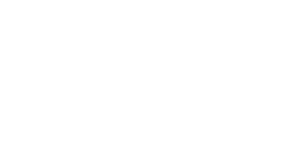

In [27]:
data = R.ravel()
plt.figure()
plt.imshow(data.reshape(l,l), extent=[0,c,0,c], cmap=plt.cm.jet)
plt.colorbar()

In [16]:
initial_guess = (150,c/2,c/2,1,100)
popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data, p0=initial_guess)

[188.7823808    1.87663622   1.72927172   0.70489457 103.35078843]


<IPython.core.display.Javascript object>


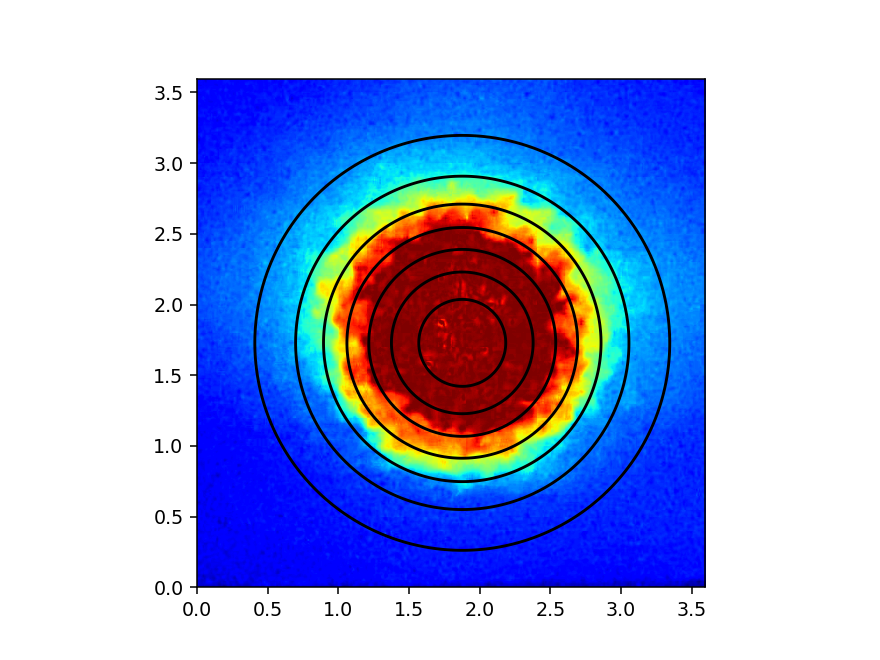

In [17]:
data_fitted = twoD_Gaussian((x, y), *popt)
print(popt)
fig, ax = plt.subplots(1, 1)
ax.imshow(data.reshape(l, l), cmap=plt.cm.jet, extent=[0,c,0,c])
ax.contour(x, y, data_fitted.reshape(l, l), 8, colors='black')
plt.show()

<IPython.core.display.Javascript object>


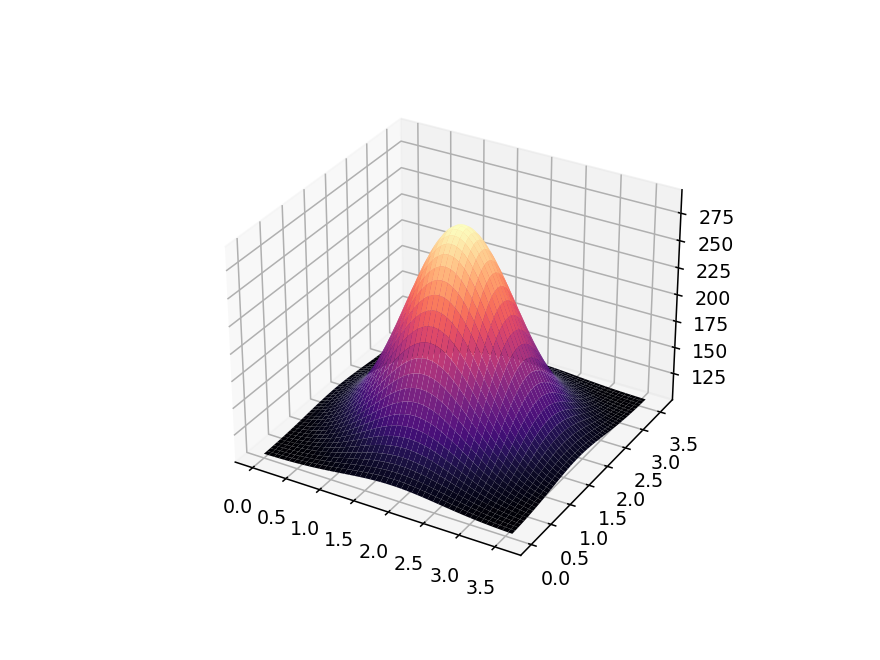

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, data_fitted.reshape(l, l), cmap="magma")
plt.savefig("test1.jpg")

In [19]:
#w(z)
print(np.sqrt(4*(popt[3])**2))

1.4097891328612377
